In [41]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import math as math
import pandas as pd

In [2]:
mx=np.linspace(1e-1, 1e4, num=5e3)
Z = 18; N = 22; A = Z + N;
M = 931.5 * 39 * 1e-3; #Masa del nucleo en GeVs
GF = 1.166e-11 * 1e6; #Constante de Fermi en GeVs

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


In [3]:
mr = mx * M / (mx + M); #Masa reducida
Nbar = (N - Z*(1 - 4*0.23));
secA = mr**2 * Nbar**2 * GF**2/(4 * math.pi)
vo = 233 # km s^-1
sigma = 1e-7 # pb
rho = 0.3

In [4]:
Ro_norm = 126 * (sigma/1) * (1/mr)**2 * (rho/0.4) * (vo/230)

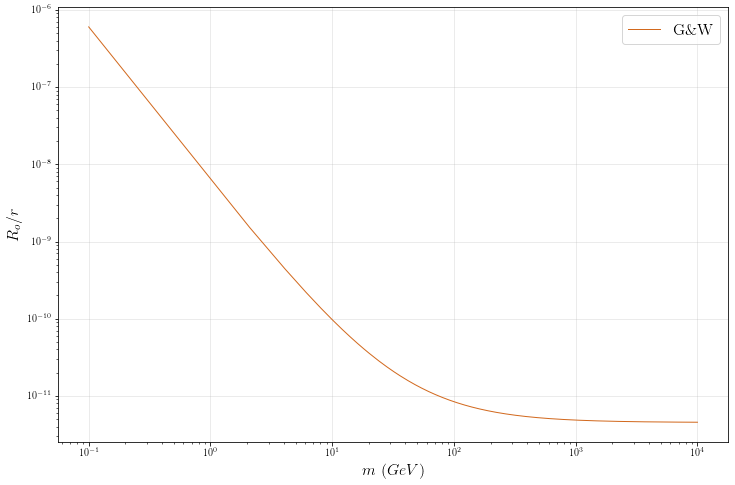

In [5]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))	

plt.plot(mx, Ro_norm/A**2,'chocolate',lw=1)
plt.grid('--', alpha=0.3)

plt.ylabel(r"$R_o/r$",fontsize=16)
plt.xlabel(r'$m\ (GeV)$',fontsize=16)

plt.legend([r'G\&W'], fontsize=16)
plt.xscale('log')
plt.yscale('log')

plt.show()

# Annual modulation

In [17]:
t = np.asarray([i for i in range(0, 366)])
vE = 232 + 15*np.cos(2*np.pi* (t - 152.5)/365.25)

In [40]:
startday = pd.datetime(2019, 1, 1)
startday

datetime.datetime(2019, 1, 1, 0, 0)

In [28]:
days = pd.date_range(startday, periods=366, freq='D')
days

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10',
               ...
               '2019-12-23', '2019-12-24', '2019-12-25', '2019-12-26',
               '2019-12-27', '2019-12-28', '2019-12-29', '2019-12-30',
               '2019-12-31', '2020-01-01'],
              dtype='datetime64[ns]', length=366, freq='D')

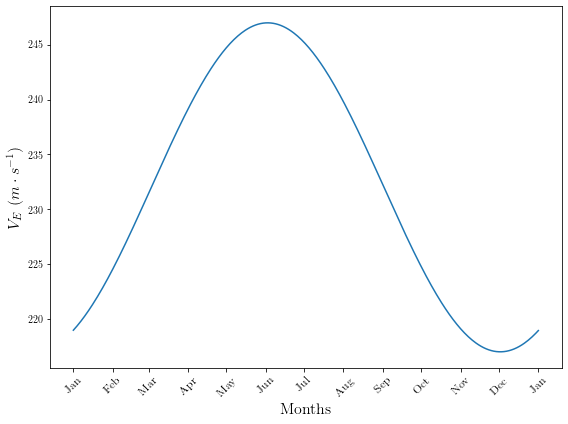

In [54]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
xaxis = ax.get_xaxis()
plt.plot(days, vE)
plt.xlabel('Months', fontsize=16)
plt.ylabel('$V_E\ (m\cdot s^{-1})$', fontsize=16)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()

In [51]:
(1 - 232 / vE.max())*1e2

6.072663498551956